# Problem Statement

The dataset contains grades scored by students throughout their university
tenure in various courses and their CGPA calculated based on their grades

Columns Description -- total 43 columns
- Seat No: The enrolled number of candidates that took the exams
- CGPA: The cumulative GPA based on the four-year total grade progress of each candidate. CGPA is a Final Marks -- provided to student.
- All other columns are course codes in the format AB-XXX where AB are
alphabets representing candidates' departments and XXX are numbers
where first X represents the year the candidates took exam

- Predict CGPA of a student based on different grades in four years

Refer SKlearn official Documnetation if yor are sure about syntax or parameter .


https://scikit-learn.org/stable/index.html


In [156]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [157]:
data=pd.read_csv("/content/Grades.csv")

In [158]:
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [159]:
data.shape

(571, 43)

There are 571 rows and 43 columns. Here all the values in column 'Seat No.' suggest that the Department is CS and batch is '97.

In [160]:
data.isnull().sum().sum()

425

There are 425 null values. Since Grade table is not provided. Analysis cannot be done on dataset with null values. Hence, removing null values.

In [161]:
data.dropna(axis=0,inplace=True)

In [162]:
data.reset_index(drop =True,inplace=True)

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   417 non-null    object 
 1   PH-121     417 non-null    object 
 2   HS-101     417 non-null    object 
 3   CY-105     417 non-null    object 
 4   HS-105/12  417 non-null    object 
 5   MT-111     417 non-null    object 
 6   CS-105     417 non-null    object 
 7   CS-106     417 non-null    object 
 8   EL-102     417 non-null    object 
 9   EE-119     417 non-null    object 
 10  ME-107     417 non-null    object 
 11  CS-107     417 non-null    object 
 12  HS-205/20  417 non-null    object 
 13  MT-222     417 non-null    object 
 14  EE-222     417 non-null    object 
 15  MT-224     417 non-null    object 
 16  CS-210     417 non-null    object 
 17  CS-211     417 non-null    object 
 18  CS-203     417 non-null    object 
 19  CS-214     417 non-null    object 
 20  EE-217    

Now, after removing null values we have 417 rows in the dataset.

In [164]:
data.duplicated().sum()

0

No Duplicates were found

In [165]:
data.describe()

,CGPA
count,417.000000
mean,2.990386
std,0.578246
min,1.708000
25%,2.603000
50%,3.033000
75%,3.452000
max,3.985000


Now , The data looks good and there are no missing values , also the first column is just serial number , so we dont  need that column . Lets drop it form the data and make it more clean.

Also, CGPA columns indicates the range of values in between 0.0 to 4.0

In [166]:
target = data['CGPA']
data=data.drop(columns=['Seat No.'])
data=data.drop(columns=['CGPA'])

Lets visualize the CGPA  and analyze it


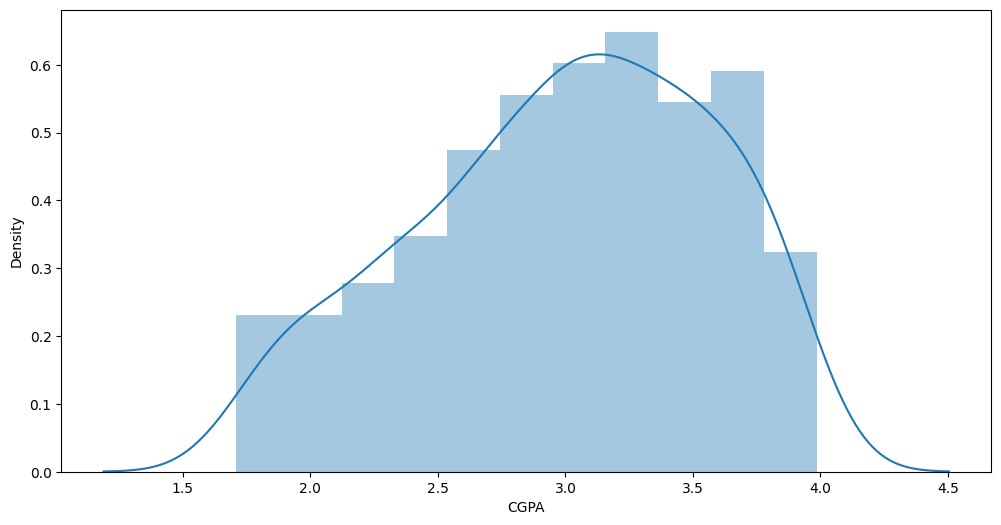

In [167]:
plt.figure(figsize=(12,6))
sns.distplot(target)
plt.show()

The data distribution looks decent enough and there does not sems to by any major skeweness.

In [168]:
data.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A


Converting the Grades which are string format to integers using Ordinal Encoders

Below is list of unique grades found in entire dataset.

In [169]:
# Collecting grades
grades_list=[]
for i in range(data.shape[1]):
  col = data.iloc[:,i]
  grades_list += list(col.unique())

grades_list = list(dict.fromkeys(grades_list))
grades_list

['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'A+', 'F', 'WU', 'W']

In [170]:
#Creating ordered grades list
ord_grades_list = ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','F','WU','W']
enc = OrdinalEncoder(categories=[ord_grades_list])
enc

OrdinalEncoder(categories=[['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-',
                            'D+', 'D', 'F', 'WU', 'W']])

Below is the data table after encoding the Grades to integers

In [171]:
for i in data.columns:
  data[[i]] = enc.fit_transform(data[[i]])


data.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5.0,9.0,8.0,7.0,8.0,9.0,10.0,8.0,5.0,8.0,...,7.0,8.0,8.0,8.0,8.0,2.0,1.0,8.0,4.0,2.0
1,1.0,10.0,9.0,10.0,5.0,7.0,10.0,1.0,9.0,10.0,...,10.0,9.0,10.0,7.0,10.0,2.0,5.0,7.0,7.0,4.0
2,1.0,4.0,1.0,5.0,3.0,1.0,5.0,3.0,2.0,2.0,...,2.0,4.0,4.0,1.0,7.0,1.0,1.0,1.0,2.0,1.0
3,10.0,6.0,9.0,10.0,10.0,2.0,9.0,8.0,10.0,6.0,...,8.0,9.0,7.0,9.0,8.0,5.0,4.0,6.0,6.0,6.0
4,2.0,2.0,2.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,...,2.0,5.0,3.0,3.0,5.0,2.0,1.0,2.0,2.0,1.0


In [172]:
y=target
X=data

Lets use linear regression to predict and see how good it fits our data . Before that we first split our data in train and test

In [173]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=100)

# Model Instantiating and Training

In [174]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

#Model Evaluation

Now its time to check how good in our model.
Lets check how well model fits on train data.

In [175]:
#Adjusted R2
regression.score(x_train,y_train)

#Training Score
# So that is how i am going to check how good my model understood the training data.

0.9974148503562809

In [176]:
#How Well my model will understand testing data.
# Lets check how well model fits the test data
regression.score(x_test,y_test)

#Testing Score

0.9954093663246505

# Lets Plot and Visualize

Now i wanted to test it , Now i am going to pass only x_test to regression model and it is going to predict.

 and i also have actual label


 then i will compare predicted data to actual data .


 Whatever the result am going to get its my model Confidence / How well my model will perform.

In [177]:
y_pred =(regression.predict(x_test))
y_pred



array([3.13993926, 3.167074  , 3.45252801, 3.81311392, 2.39716654,
       1.74777964, 2.52683167, 1.61970964, 3.57835653, 2.98272089,
       3.52153842, 3.61327821, 2.9257232 , 3.32831257, 3.55049836,
       2.59236616, 3.32762247, 1.76852282, 3.10468798, 3.31421022,
       2.93848531, 2.02172918, 3.61483345, 1.78120312, 3.06583425,
       2.91297189, 3.30184502, 3.02515499, 2.65963514, 3.56490856,
       3.3502455 , 3.65032501, 2.67357892, 1.95320707, 3.20802351,
       3.7224602 , 3.55561848, 3.65136704, 2.83912821, 2.43547685,
       3.10001647, 3.80040605, 3.01202152, 3.71161487, 3.60548161,
       2.81831854, 3.13349247, 2.20342283, 3.73014002, 2.25085283,
       3.75457144, 1.94539887, 3.20461635, 3.32111502, 3.01604659,
       3.27097094, 2.52826602, 3.11085142, 2.41893255, 2.88668039,
       2.02260398, 3.02196564, 3.19214536, 3.96492761, 2.92309636,
       3.78683481, 3.17412904, 3.01379491, 3.12055977, 2.39164354,
       2.29556518, 2.91418613, 3.42965711, 3.06216271, 3.83124

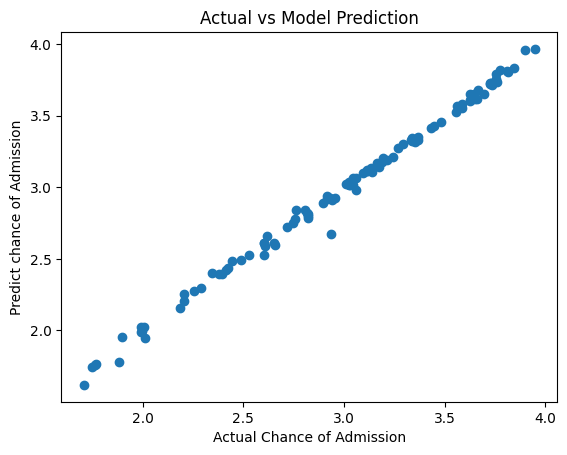

In [178]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predict chance of Admission')
plt.title('Actual vs Model Prediction')
plt.show()

In [179]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [180]:
y_pred=regression.predict(x_test)

In [181]:
#MAE
mean_absolute_error(y_test,y_pred)

0.023925444282193613

In [182]:
#MSE
mean_squared_error(y_test,y_pred)

0.0015673311747904696

In [183]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.03958953365209635

We got low RMSE, MSE, MAE score and R2 score is also good (99% approx for both training and testing)